## Loading Libraries and Tools

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

## Creating Dataframe

In [6]:
df = pd.read_csv('Model Data.csv')
df

,headlines,Date,Adj Close,Close,High,Low,Open,Volume,Sentiment
0,UPVOTE so everyone sees we got SUPPORT,2021-01-28,92.927292,93.155502,94.941498,92.132004,92.196999,35462000,0.5319
1,GME YOLO update — Jan 28 2021,2021-01-28,92.927292,93.155502,94.941498,92.132004,92.196999,35462000,0.4278
2,GME YOLO month-end update — Jan 2021,2021-01-29,91.562141,91.787003,92.863998,90.510002,92.308502,32252000,0.4278
3,It’s treason then,2021-01-29,91.562141,91.787003,92.863998,90.510002,92.308502,32252000,-0.4404
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,2021-01-28,92.927292,93.155502,94.941498,92.132004,92.196999,35462000,-0.5994
...,...,...,...,...,...,...,...,...,...
2159,Good way to start a week,2021-04-13,113.085785,113.363503,113.860497,112.804497,113.073502,23310000,0.4404
2160,"Well, shit.....",2024-06-04,174.700958,175.130005,175.190002,173.220001,174.449997,14066600,0.2732
2161,"Jim Cramer urges investors to exit crypto, say...",2022-12-06,97.071602,97.309998,100.209999,96.760002,99.669998,20877600,-0.1779
2162,Third member of prestigious FDA panel resigns ...,2021-06-11,125.388573,125.696503,126.349503,124.914497,126.246002,25240000,0.2023


## Feature Engineering for Sentiment vs Stock Price Change

In [7]:
df['Price Change'] = df['Close'].diff().fillna(0).apply(lambda x : 1 if x>0 else 0)

In [12]:
df

,headlines,Date,Adj Close,Close,High,Low,Open,Volume,Sentiment,Price Change
0,UPVOTE so everyone sees we got SUPPORT,2021-01-28,92.927292,93.155502,94.941498,92.132004,92.196999,35462000,0.5319,0
1,GME YOLO update — Jan 28 2021,2021-01-28,92.927292,93.155502,94.941498,92.132004,92.196999,35462000,0.4278,0
2,GME YOLO month-end update — Jan 2021,2021-01-29,91.562141,91.787003,92.863998,90.510002,92.308502,32252000,0.4278,0
3,It’s treason then,2021-01-29,91.562141,91.787003,92.863998,90.510002,92.308502,32252000,-0.4404,0
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,2021-01-28,92.927292,93.155502,94.941498,92.132004,92.196999,35462000,-0.5994,1
...,...,...,...,...,...,...,...,...,...,...
2159,Good way to start a week,2021-04-13,113.085785,113.363503,113.860497,112.804497,113.073502,23310000,0.4404,0
2160,"Well, shit.....",2024-06-04,174.700958,175.130005,175.190002,173.220001,174.449997,14066600,0.2732,1
2161,"Jim Cramer urges investors to exit crypto, say...",2022-12-06,97.071602,97.309998,100.209999,96.760002,99.669998,20877600,-0.1779,0
2162,Third member of prestigious FDA panel resigns ...,2021-06-11,125.388573,125.696503,126.349503,124.914497,126.246002,25240000,0.2023,1


In [8]:
X = df[['Sentiment']]
Y = df[['Price Change']]

## Splitting Train and Test Data

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=56)

In [92]:
print(Y_train.value_counts())
print(Y_test.value_counts())

Price Change
0               454
1               411
Name: count, dtype: int64
Price Change
0               655
1               644
Name: count, dtype: int64


## Traning the Model on Logistic Regression

In [93]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, Y_train.values.ravel())

LogisticRegression(class_weight='balanced')

In [94]:
y_pred = model.predict(X_test)
print('Classification Reort: ',classification_report(Y_test,y_pred,zero_division=0))
print('Accuracy: ',accuracy_score(Y_test,y_pred))

Classification Reort:                precision    recall  f1-score   support

           0       0.50      1.00      0.67       655
           1       0.00      0.00      0.00       644

    accuracy                           0.50      1299
   macro avg       0.25      0.50      0.34      1299
weighted avg       0.25      0.50      0.34      1299

Accuracy:  0.5042340261739799


## Prediction via Visualization

In [42]:
prediction_summary = df.groupby('Date').agg({
    'Sentiment' : 'mean',
    'Close' : 'mean',
    'Price Change' : 'sum'
}).reset_index()

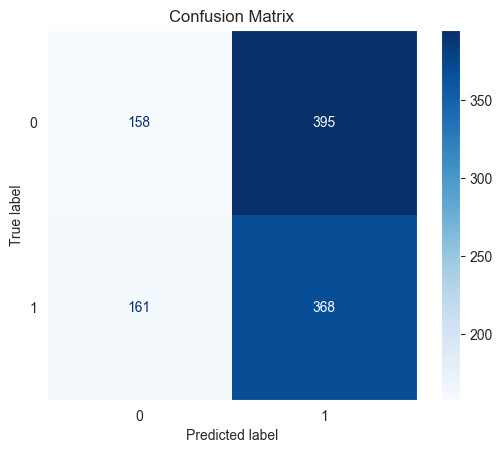

In [19]:
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred,cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

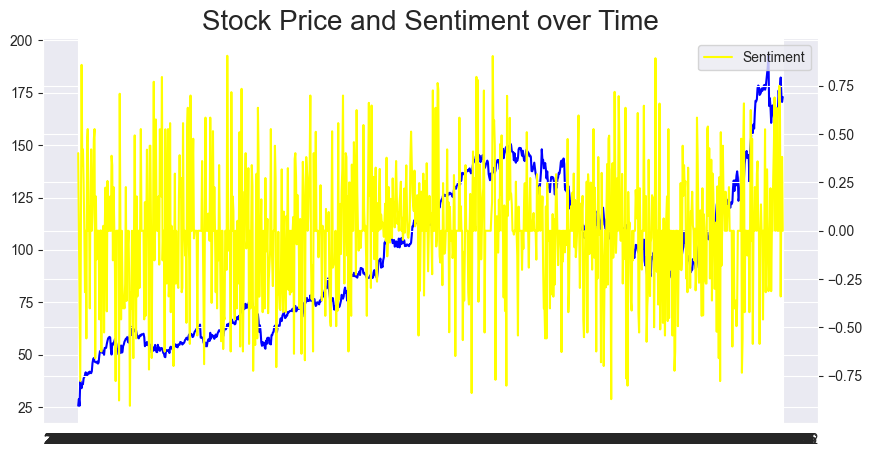

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(prediction_summary['Date'], prediction_summary['Close'], label='Stock Price', color='blue')
plt.twinx()
plt.plot(prediction_summary['Date'], prediction_summary['Sentiment'], label='Sentiment', color='yellow')
plt.title('Stock Price and Sentiment over Time', fontsize=20)
plt.xlabel('Date')
plt.legend()
plt.show()

#### The above plot shows us that sentiment value has risen over time while the stock value keeps fluctutating mostly nearing the price change of 0.25 to -0.5.
#### In the beginning we have, mostly negative price changes therefore sentiment value is also negative, but as the stock begins to get better price change, the sentiment value becomes positive.

In [27]:
fig = px.scatter(prediction_summary, x='Sentiment', y='Close', color='Price Change', title='Stock Price vs Sentiment')
fig.show()

#### In the above plotly interactive plot, most of the values are near the 0 price change cluster, with about 96% of values ranging between 0.5 and -0.5, the rest 4% of values lie beyond the price range of 0.5 and -0.5. 

## Thus we have our Machine Learning Model that predicts Stock Movements according to Headline Sentiment Analysis with an accuracy of 50.4%